# Dimension Reduction with PCA

## 패키지 로드

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import rcParams

rcParams['font.family']='NanumGothic'
rcParams['axes.unicode_minus'] = False

## 데이터 로드

In [5]:
raw_data_merged = pd.read_csv('data/raw_data_merged.csv')
raw_data_merged.head()

,Unnamed: 0,날짜,AUD/KRW (호주 달러 / 한국 원),AUD/USD (호주 달러 / 미국 달러),Baltic Capesize Index (BCI)1999.03.01,Baltic Clean Tanker Index (BCTI)1998.08.03,Baltic Dirty Tanker Index (BDTI)1998.08.03,Baltic Dry Index (BDI)1985.01.04,Baltic Handysize Index (BHSI)2006.05.23,Baltic Panamax Index (BPI)1998.05.06,...,Rogers International Commodities Index Metals1998.07.31=1000,Rogers International Commodities Index1998.07.31=1000,S&P GSCI,TOCOM Index2002.05.31=100,TR/CC CRB Index,US Dollar IndexMar 1973=100,USD/CNY (미국 달러 / 중국 인민폐),USD/KRW (미국 달러 / 한국 원),USD/RMB (미국 달러 / 중국 인민폐),철광석 Fines (Daily) [중국(수입가 CFR)] 현물
0,3,20180713,834.80,0.74,3156.0,499.0,744.0,1666.0,559.0,1527.0,...,2024.48,2471.47,463.37,290.24,193.73,90.2872,6.69,1127.8,6.67,64.04
1,4,20180712,825.47,0.74,3041.0,500.0,738.0,1632.0,558.0,1517.0,...,2035.74,2469.69,461.47,289.13,194.00,90.1620,6.67,1120.8,6.67,64.06
2,5,20180711,827.72,0.74,2793.0,499.0,741.0,1586.0,558.0,1498.0,...,2022.94,2448.64,459.38,292.99,192.83,89.8616,6.68,1113.8,6.62,63.34
3,6,20180710,830.33,0.74,2792.0,499.0,732.0,1555.0,560.0,1431.0,...,2063.83,2526.33,480.64,294.63,198.29,89.7541,6.63,1112.3,6.63,63.90
4,7,20180709,830.80,0.75,3016.0,501.0,729.0,1609.0,562.0,1367.0,...,2081.98,2532.26,481.11,291.48,198.23,89.6613,6.62,1117.8,6.64,63.92


In [6]:
raw_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
Unnamed: 0                                                           1680 non-null int64
날짜                                                                   1680 non-null int64
AUD/KRW (호주 달러 / 한국 원)                                               1680 non-null float64
AUD/USD (호주 달러 / 미국 달러)                                              1680 non-null float64
Baltic Capesize Index (BCI)1999.03.01                                1680 non-null float64
Baltic Clean Tanker Index (BCTI)1998.08.03                           1680 non-null float64
Baltic Dirty Tanker Index (BDTI)1998.08.03                           1680 non-null float64
Baltic Dry Index (BDI)1985.01.04                                     1680 non-null float64
Baltic Handysize Index (BHSI)2006.05.23                              1680 non-null float64
Baltic Panamax Index (BPI)1998.05.06                                 1680 non-

데이터 중에서 기간이 짧은?(2~3년) 변수는 버리고 na인 값들 버리고 최종적으로 1680개의 observation과 29개 변수를 남겼다.
이 데이터를 이용해서 PCA를 해보고 데이터의 차원을 줄여보도록 한다.

## PCA
### preprocessing

우선 scaler를 통해 데이터의 스케일을 맞춰준다.

In [7]:
scaler = StandardScaler()
data_std = scaler.fit_transform(raw_data_merged.iloc[:,1:-1]) #날짜, 철광석 제외
print('shape = ',data_std.shape)
data_std[0:5,:]

shape =  (1680, 27)


array([[ 1.72603602, -1.19216261, -1.20971462,  1.21335762, -1.21569973,
        -0.16659626,  0.58766632, -0.11964823,  0.23206064, -0.12405935,
        -1.18477126, -0.86504416, -0.51134924,  2.71340458, -0.25059937,
        -1.10337305, -1.28688848, -0.89338403, -0.59765942, -0.87859912,
        -0.48569145,  0.09865277, -1.07359946,  1.07062072,  0.99435607,
         0.22845731,  0.92267785],
       [ 1.72599541, -1.26524307, -1.20971462,  1.10067075, -1.20618353,
        -0.21372365,  0.53870327, -0.12364729,  0.21994044, -0.12602263,
        -1.17818753, -0.89626856, -0.53887525,  2.72036393, -0.2897516 ,
        -1.13128603, -1.28003669, -0.90492574, -0.56608389, -0.88120533,
        -0.50071994,  0.07416938, -1.06883   ,  1.05564359,  0.91438488,
         0.07244674,  0.92267785],
       [ 1.7259548 , -1.24761917, -1.20971462,  0.85765907, -1.21569973,
        -0.19015995,  0.47245914, -0.12364729,  0.19691207, -0.12994919,
        -1.19976754, -0.7901056 , -0.45311239,  2.6950

### eigenvalue & eigenvector 구하기
#### 1. numpy 이용

In [8]:
cov_mat = np.cov(data_std.T)
print('shape of cov_mat = ',cov_mat.shape)
cov_mat

shape of cov_mat =  (27, 27)


array([[ 1.00059559, -0.84577694, -0.78599298, -0.41365345, -0.54229196,
        -0.19764082, -0.56742776, -0.62848188, -0.56861843, -0.66746848,
        -0.87552343, -0.12087931, -0.58480737,  0.77866482, -0.61035609,
        -0.59324824, -0.72969128, -0.79061502, -0.67630453, -0.78032045,
        -0.69803777, -0.31499915, -0.83019677,  0.84929401,  0.04781505,
        -0.06143524,  0.02141746],
       [-0.84577694,  1.00059559,  0.95586506,  0.23600158,  0.42994451,
        -0.04979778,  0.28248027,  0.37505954,  0.29774806,  0.390286  ,
         0.90576045,  0.17516204,  0.76551463, -0.63883204,  0.71245748,
         0.83760344,  0.86533404,  0.81015154,  0.82554616,  0.86505656,
         0.84418636,  0.41322628,  0.87191141, -0.9029279 , -0.17378828,
        -0.01614966, -0.12587471],
       [-0.78599298,  0.95586506,  1.00059559,  0.22950784,  0.38775656,
        -0.11343923,  0.22881098,  0.31453713,  0.22626978,  0.32912581,
         0.94593993,  0.0184315 ,  0.86031341, -0.5744

In [9]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([1.40316500e+01, 5.70238098e+00, 2.26047323e+00, 1.89445736e+00,
       1.11417737e+00, 6.34160039e-01, 3.45885045e-01, 3.12189486e-01,
       2.03112480e-01, 1.73895108e-01, 1.00923406e-01, 7.00973713e-02,
       4.51644370e-02, 3.30719723e-02, 2.39920968e-02, 1.67101287e-02,
       1.58206347e-02, 9.96654280e-03, 8.21479106e-03, 5.58473876e-03,
       5.16233811e-03, 3.25484731e-03, 1.77311278e-04, 6.90822447e-04,
       1.99535869e-03, 1.51745607e-03, 1.35560228e-03])

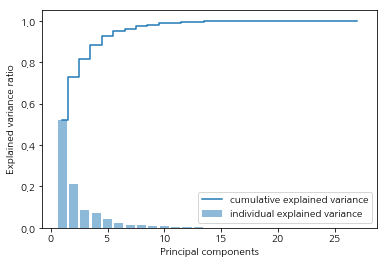

In [10]:
tot_eigen_vals = sum(eigen_vals)
var_exp = [(i/tot_eigen_vals) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
def plot_exp_var(var_exp,cum_var_exp,n_comp):
    plt.bar(range(1,n_comp+1),var_exp,alpha=0.5,align='center',label = 'individual explained variance')
    plt.step(range(1,n_comp+1),cum_var_exp,where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.show()
    
plot_exp_var(var_exp,cum_var_exp,27)

3개 정도의 PC가 0.8이상의 variance를 가지므로 3개를 선택해본다.

In [11]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i])for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(14.03165004609075,
  array([-0.2281046 ,  0.24113244,  0.25442281,  0.0997831 ,  0.13149454,
          0.00679732,  0.10912925,  0.12946733,  0.10597169,  0.13508709,
          0.26477218, -0.01109695,  0.23545209, -0.15128587,  0.22666581,
          0.21656929,  0.24329098,  0.25034952,  0.23776724,  0.26100715,
          0.25349388,  0.16736006,  0.26258795, -0.25997913, -0.07580672,
         -0.08665419, -0.06502296])),
 (5.702380982846056,
  array([ 0.11407473,  0.00777939,  0.06186642, -0.2695139 , -0.13008099,
         -0.20903512, -0.35090314, -0.33811919, -0.36492548, -0.33498861,
          0.00982878,  0.14426154,  0.07843713, -0.04969642, -0.06366514,
          0.09305851,  0.09115542,  0.06655506, -0.03057309,  0.07693982,
          0.09452659,  0.21660059,  0.04928935, -0.00255976, -0.32748236,
         -0.17840175, -0.32833424])),
 (2.2604732308243,
  array([ 0.24710975, -0.17599312, -0.02731407,  0.132665  , -0.1528508 ,
         -0.13587818,  0.03938744,  0.0250011 ,  

In [12]:
w= np.vstack((eigen_pairs[0][1],
             eigen_pairs[1][1])).T
print(w.shape)
w = w/np.sum(w,axis=0,keepdims=True)
print(w)

(27, 2)
[[-0.07720187 -0.06087538]
 [ 0.08161113 -0.00415143]
 [ 0.08610925 -0.03301469]
 [ 0.03377153  0.14382467]
 [ 0.04450425  0.06941703]
 [ 0.00230055  0.11155049]
 [ 0.03693473  0.18725761]
 [ 0.04381814  0.18043552]
 [ 0.03586606  0.19474056]
 [ 0.04572015  0.17876491]
 [ 0.08961199 -0.00524508]
 [-0.00375576 -0.07698441]
 [ 0.07968862 -0.04185756]
 [-0.05120262  0.02652024]
 [ 0.07671491  0.03397457]
 [ 0.07329775 -0.04966018]
 [ 0.08234169 -0.04864461]
 [ 0.08473065 -0.03551675]
 [ 0.08047218  0.01631517]
 [ 0.08833772 -0.04105853]
 [ 0.08579486 -0.05044362]
 [ 0.05664292 -0.11558777]
 [ 0.08887274 -0.026303  ]
 [-0.08798979  0.001366  ]
 [-0.02565674  0.17475924]
 [-0.02932806  0.09520316]
 [-0.02200698  0.17521384]]


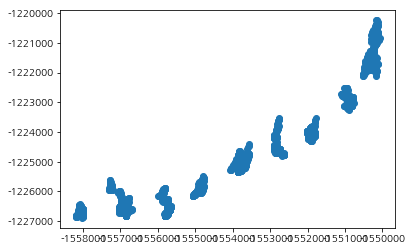

In [13]:
data_pca = raw_data_merged.iloc[:,1:-1].dot(w)
plt.scatter(data_pca.values[:,0],data_pca.values[:,1])

#### 2.scikit learn 이용

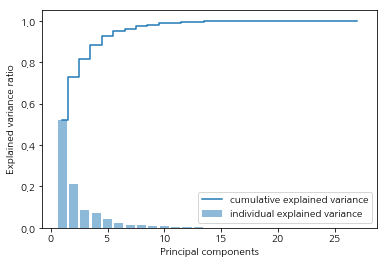

In [14]:
pca = PCA(n_components=27)
pc = pca.fit_transform(data_std)

var_exp = pca.explained_variance_ratio_
plot_exp_var(var_exp,np.cumsum(var_exp),27)

In [15]:
eig_vecs_norm = pca.components_[0:2]/np.sum(pca.components_[0:2],axis=1,keepdims=True)

## 데이터 변환 후 분석
### 데이터 변환

In [16]:
raw_data_idx = raw_data_merged.sort_values(by='날짜').iloc[:,2:]
raw_data_idx = raw_data_idx.pct_change()
raw_data_idx = raw_data_idx[1:]+1
raw_data_idx = raw_data_idx.cumprod()
raw_idx_corr = raw_data_idx.corr()
raw_idx_corr.iloc[-1]

AUD/KRW (호주 달러 / 한국 원)                                               0.869474
AUD/USD (호주 달러 / 미국 달러)                                              0.869421
Baltic Capesize Index (BCI)1999.03.01                                0.415986
Baltic Clean Tanker Index (BCTI)1998.08.03                           0.460172
Baltic Dirty Tanker Index (BDTI)1998.08.03                           0.069680
Baltic Dry Index (BDI)1985.01.04                                     0.514006
Baltic Handysize Index (BHSI)2006.05.23                              0.606315
Baltic Panamax Index (BPI)1998.05.06                                 0.534037
Baltic Supramax index (BSI)2005.01.01                                0.611409
Bloomberg Commodity Total Return                                     0.908173
CNY/KRW (중국 인민폐 / 한국 원)                                             -0.079669
CRB BLS Spot Index                                                   0.800192
DRAMeXchange Index (DXI)2001.10.01=1000                         

In [17]:
raw_idx_corr

,AUD/KRW (호주 달러 / 한국 원),AUD/USD (호주 달러 / 미국 달러),Baltic Capesize Index (BCI)1999.03.01,Baltic Clean Tanker Index (BCTI)1998.08.03,Baltic Dirty Tanker Index (BDTI)1998.08.03,Baltic Dry Index (BDI)1985.01.04,Baltic Handysize Index (BHSI)2006.05.23,Baltic Panamax Index (BPI)1998.05.06,Baltic Supramax index (BSI)2005.01.01,Bloomberg Commodity Total Return,...,Rogers International Commodities Index Metals1998.07.31=1000,Rogers International Commodities Index1998.07.31=1000,S&P GSCI,TOCOM Index2002.05.31=100,TR/CC CRB Index,US Dollar IndexMar 1973=100,USD/CNY (미국 달러 / 중국 인민폐),USD/KRW (미국 달러 / 한국 원),USD/RMB (미국 달러 / 중국 인민폐),철광석 Fines (Daily) [중국(수입가 CFR)] 현물
AUD/KRW (호주 달러 / 한국 원),1.000000,0.955307,0.235531,0.429583,-0.050478,0.282129,0.374727,0.297505,0.389988,0.905227,...,0.825034,0.864528,0.843723,0.413199,0.871369,-0.902406,-0.174314,-0.016416,-0.126392,0.869474
AUD/USD (호주 달러 / 미국 달러),0.955307,1.000000,0.229358,0.387609,-0.113876,0.228743,0.314439,0.226276,0.329066,0.945462,...,0.872036,0.943938,0.933656,0.590828,0.936480,-0.948958,-0.322752,-0.304729,-0.274330,0.869421
Baltic Capesize Index (BCI)1999.03.01,0.235531,0.229358,1.000000,0.271444,0.214326,0.877559,0.721106,0.747461,0.726428,0.309633,...,0.306035,0.259394,0.262837,0.071648,0.280099,-0.376204,0.208746,-0.045876,0.245161,0.415986
Baltic Clean Tanker Index (BCTI)1998.08.03,0.429583,0.387609,0.271444,1.000000,0.517135,0.394925,0.423124,0.439299,0.454342,0.486126,...,0.443491,0.404592,0.335407,0.202728,0.443832,-0.411819,0.020183,0.061498,0.012395,0.460172
Baltic Dirty Tanker Index (BDTI)1998.08.03,-0.050478,-0.113876,0.214326,0.517135,1.000000,0.367806,0.346710,0.416656,0.375867,0.029000,...,-0.002455,-0.052166,-0.111302,-0.108946,0.004980,0.052761,0.285680,0.218645,0.253103,0.069680
Baltic Dry Index (BDI)1985.01.04,0.282129,0.228743,0.877559,0.394925,0.367806,1.000000,0.939896,0.959857,0.950983,0.364677,...,0.336772,0.256559,0.221626,-0.049383,0.302566,-0.411525,0.373821,0.106388,0.395489,0.514006
Baltic Handysize Index (BHSI)2006.05.23,0.374727,0.314439,0.721106,0.423124,0.346710,0.939896,1.000000,0.956896,0.983812,0.449382,...,0.423676,0.336218,0.300642,-0.017768,0.379591,-0.486437,0.384669,0.112742,0.406672,0.606315
Baltic Panamax Index (BPI)1998.05.06,0.297505,0.226276,0.747461,0.439299,0.416656,0.959857,0.956896,1.000000,0.963689,0.357754,...,0.366982,0.233568,0.192416,-0.113486,0.282993,-0.393973,0.452650,0.164279,0.473050,0.534037
Baltic Supramax index (BSI)2005.01.01,0.389988,0.329066,0.726428,0.454342,0.375867,0.950983,0.983812,0.963689,1.000000,0.475052,...,0.427246,0.357274,0.310112,-0.001436,0.408665,-0.501969,0.356971,0.114497,0.373450,0.611409
Bloomberg Commodity Total Return,0.905227,0.945462,0.309633,0.486126,0.029000,0.364677,0.449382,0.357754,0.475052,1.000000,...,0.875283,0.974434,0.932977,0.598415,0.989149,-0.962260,-0.272194,-0.287002,-0.239150,0.908173


### Baltic 계열

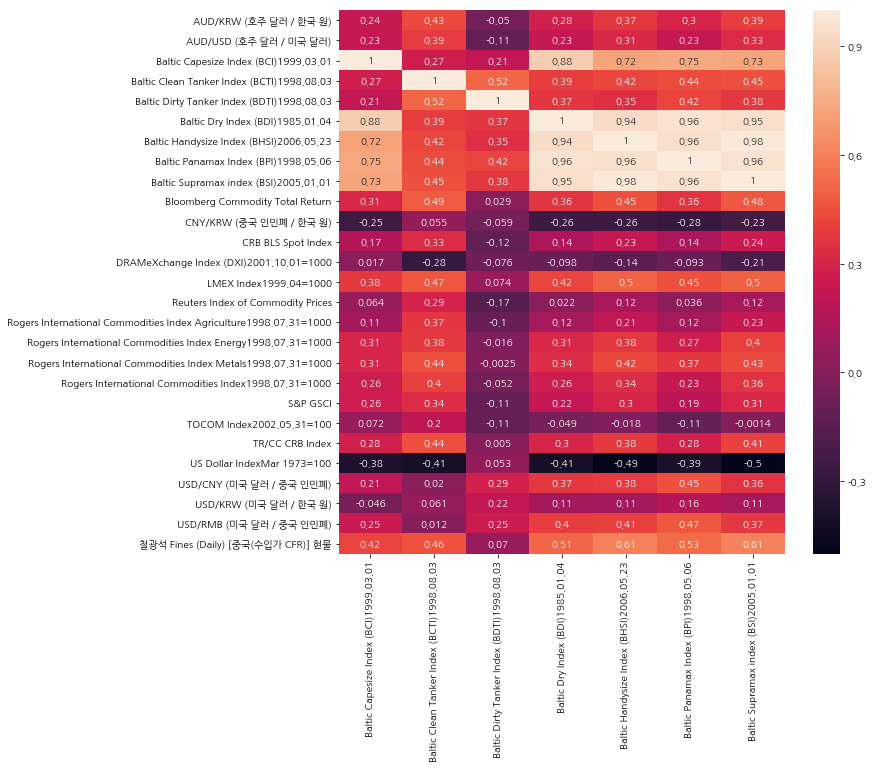

In [18]:
#plt.subplot(1,2,1)
plt.figure(figsize=(10,10))
sns.heatmap(raw_idx_corr.iloc[:,2:9],xticklabels='auto',yticklabels='auto',annot=raw_idx_corr.iloc[:,2:9])
#plt.subplot(1,2,2)
#sns.heatmap(raw_idx_corr.iloc[:,12:],xticklabels=False,yticklabels=False)

### 환율계열

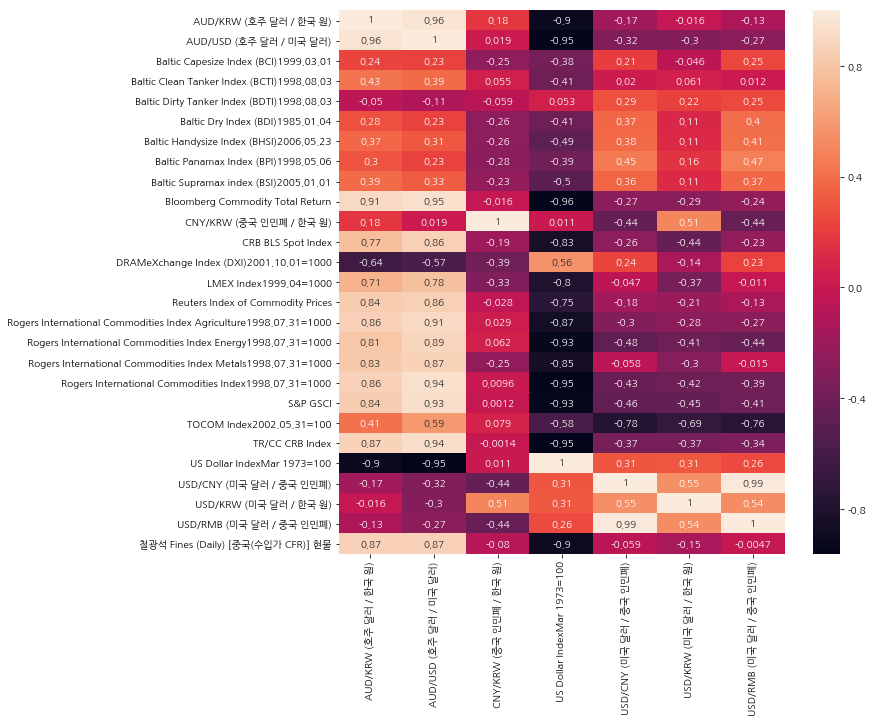

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(raw_idx_corr.iloc[:,[0,1,10,22,23,24,25]],xticklabels='auto',yticklabels='auto',annot=raw_idx_corr.iloc[:,[0,1,10,22,23,24,25]])

### 나머지

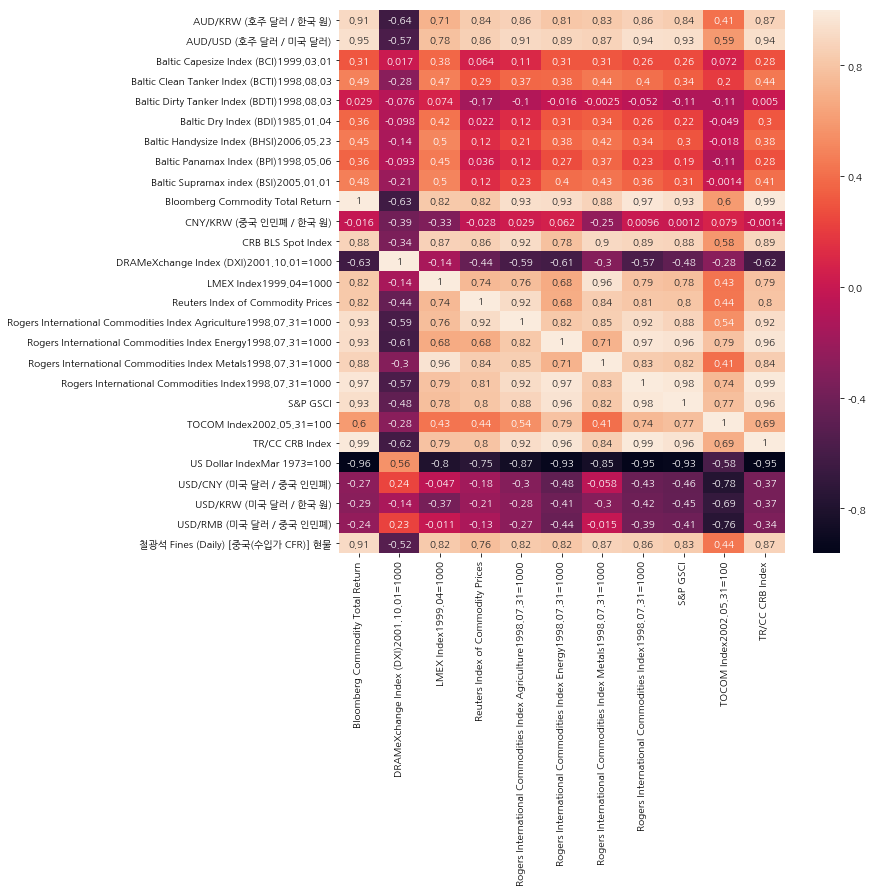

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(raw_idx_corr.iloc[:,[9,12,13,14,15,16,17,18,19,20,21]],xticklabels='auto',yticklabels='auto',
            annot=raw_idx_corr.iloc[:,[9,12,13,14,15,16,17,18,19,20,21]])

[0.86128177 0.93736725 0.97809637 0.9860287  0.99108939 0.99466922
 0.99613976 0.9971894  0.99792754 0.99845279 0.99880965 0.99912979
 0.99934424 0.99951619 0.99963386 0.99974914 0.99982733 0.99988743
 0.99993255 0.99996666 0.99998293 0.99999006 0.99999542 0.99999767
 0.99999935 1.        ]


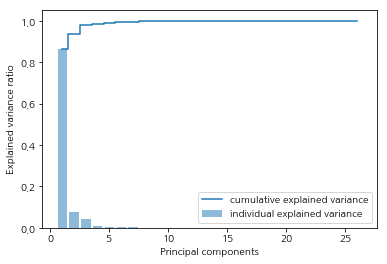

In [28]:
pca = PCA(n_components=26)
pc = pca.fit_transform(raw_data_idx.iloc[:,:-1].values)

var_exp = pca.explained_variance_ratio_
print(np.cumsum(var_exp))
plot_exp_var(var_exp,np.cumsum(var_exp),26)